In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv('co2_mm_mlo.csv', comment='#')

In [3]:
data

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
789,2023,12,2023.9583,421.86,422.60,20,0.69,0.29
790,2024,1,2024.0417,422.80,422.48,27,0.70,0.26
791,2024,2,2024.1250,424.62,423.67,21,1.22,0.51
792,2024,3,2024.2083,425.38,423.89,22,0.99,0.40


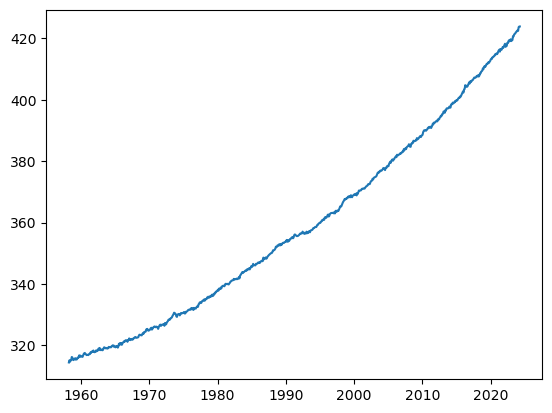

In [4]:
plt.plot(data["decimal date"], data['deseasonalized'])

In [5]:
good = np.where(data["decimal date"] > 2010)

In [6]:
def func_line(x, a, b):
    return a * x + b
cf, cov = curve_fit(func_line, data["decimal date"].values[good], data['deseasonalized'].values[good])

In [7]:
cf

array([ 2.44506951e+00, -4.52637771e+03])

Text(0, 0.5, 'CO2 (ppm)')

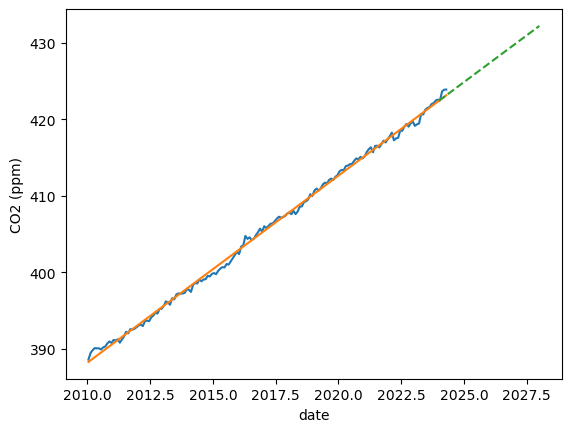

In [8]:
plt.plot(data["decimal date"].values[good], data['deseasonalized'].values[good])
plt.plot(data["decimal date"].values[good], func_line(data["decimal date"].values[good], cf[0], cf[1]))
projected_x = np.linspace(2024, 2028, 20)
plt.plot(projected_x, func_line(projected_x, cf[0], cf[1]), '--')
plt.xlabel('date')
plt.ylabel('CO2 (ppm)')

In [9]:
print('Projection for 1st day of 2028 is %f ppm' % func_line(2028., cf[0], cf[1]))

Projection for 1st day of 2028 is 432.223253 ppm


Can check the results at https://gml.noaa.gov/ccgg/trends/graph.html
If we are way below, that's good. same or above, that's bad.

In [10]:
resids = data['deseasonalized'].values[good] - func_line(data["decimal date"].values[good], cf[0], cf[1])

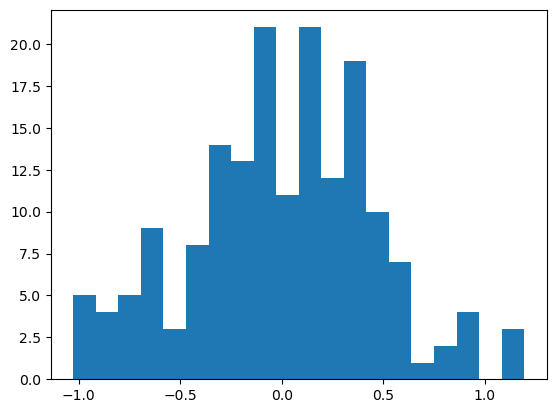

In [11]:
_temp = plt.hist(resids, bins=20)

In [12]:
resids.std()

0.4547816457367761

In [13]:
# Looks like standard deviation of residuals is ~0.5 ppm. So ~1.5 ppm is starting to be significant. Particle physicists want 2.5 ppm diff.